# <font color = 'orange'> ANN Implementation Using Keras

---

### <font color = 'blue'> Importing libraries

In [1]:
from tensorflow import keras as krs

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

D:\Anconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


---

## Creating a simple classifier using keras on MNIST data
* Contains handwritten digits from 1 to 9 with black digit with white backgroud.
* Here, we have to do the mutliclass classification problem to identify the digits.
    

In [2]:
mnist = krs.datasets.mnist

mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\darsh\\AppData\\Roaming\\Python\\Python39\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [4]:
x_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

### <font color = '#AA00FF'> Observation :
* Images are represented as 2d arrary.

---

In [5]:
x_test.min() , x_test.max()

(0, 255)

### <font color = '#AA00FF'> Observation :
* 255 is the maximum value present in the array and 0 is the minimum value present in the array.
* We can scale them to reduce the computation time.

---

In [6]:
x_train_full.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

---

### <font color = 'blue'> Splitting the training data into trianing and validation data.    

In [8]:
# create a validation data set from the full training data 

# Scale the INPUT data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
x_vaild, x_train = x_train_full[:5000] / 255., x_train_full[5000:] / 255. 
y_vaild, y_train = y_train_full[:5000], y_train_full[5000:] 

# Scaling test data as well
x_test = x_test / 255.

### <font color = '#AA00FF'> Observation :
* Train -> 50k
* Test -> 10k
* Validation -> 5k

---

### <font color = 'blue'> Viewing some data

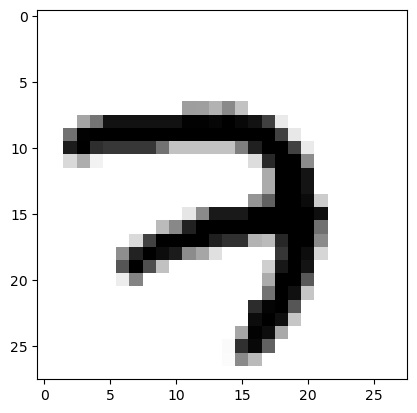

In [9]:
plt.imshow(x_train[0], cmap = 'binary')

<AxesSubplot:>

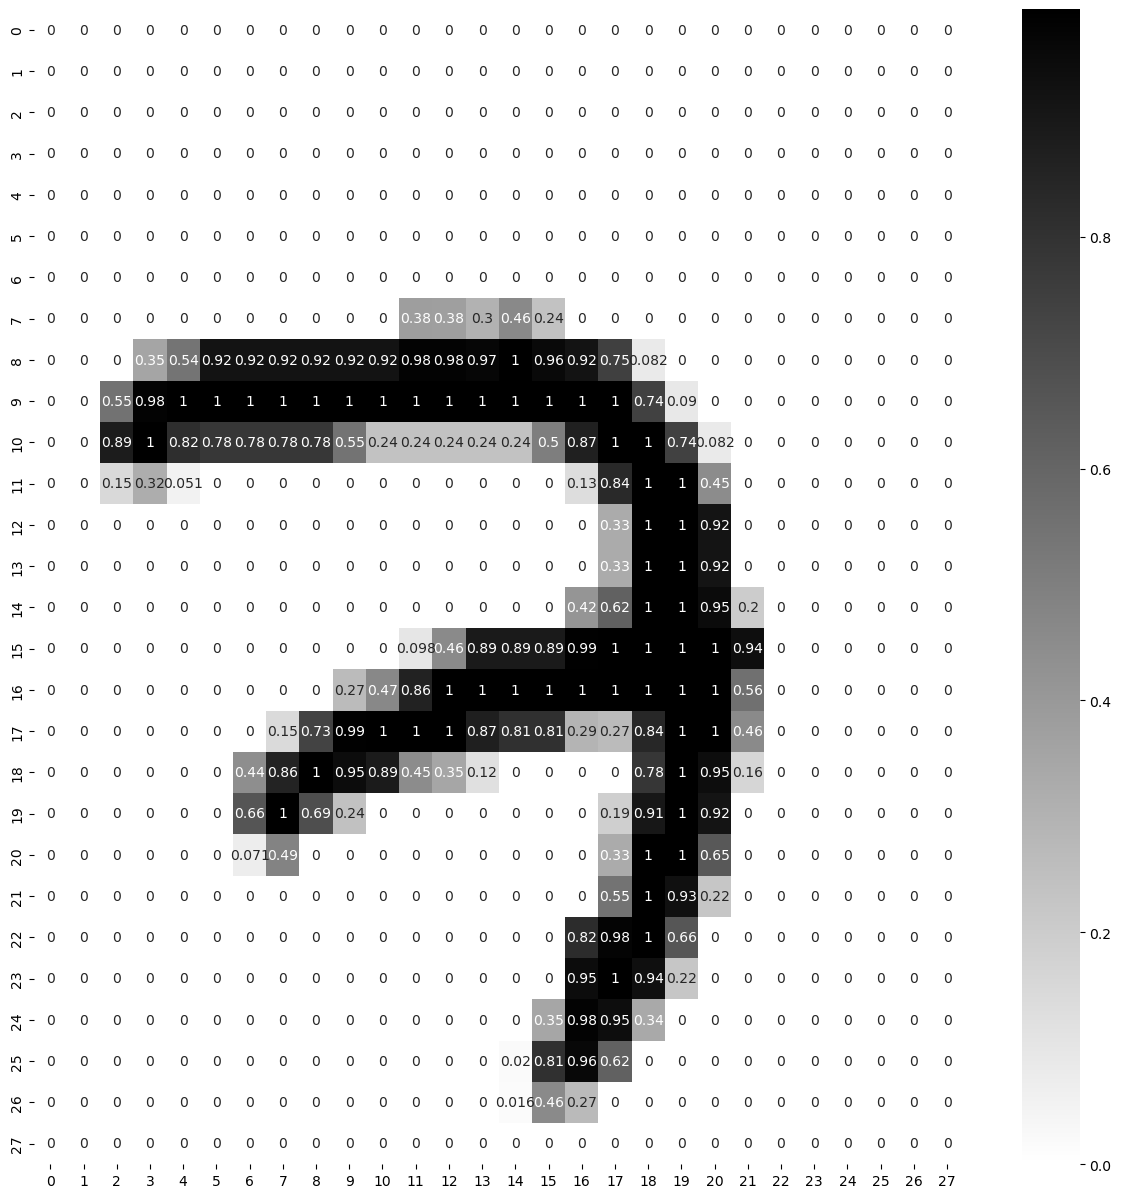

In [10]:
plt.figure(figsize = (15, 15))

sns.heatmap(x_train[0], annot = True, cmap = 'binary')

### <font color = '#AA00FF'> Observation :
* Each image is of 28 x 28 matrix.
* We will flatten and streach the 28 x 28 matrix to 784 array.

---

## Architecture Used:

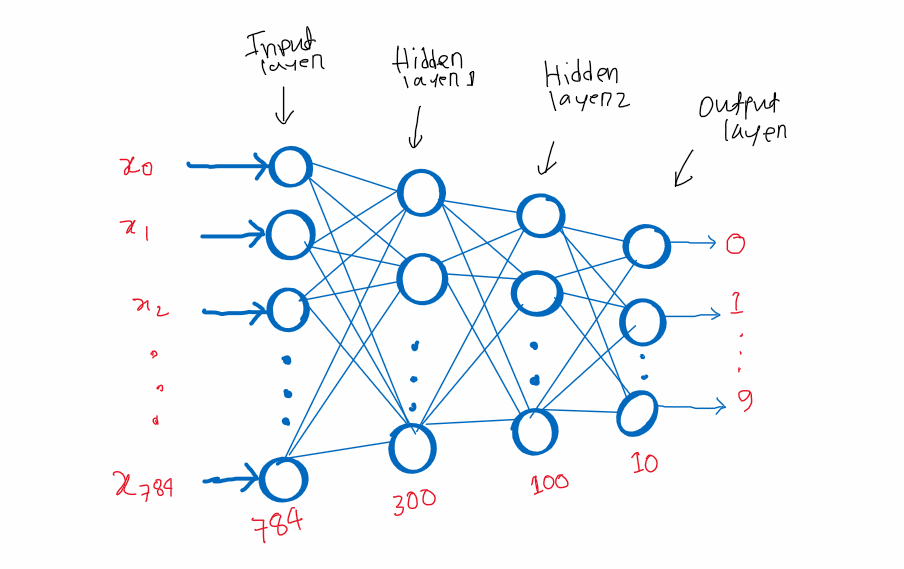

In [11]:
28 * 28

784

### <font color = '#AA00FF'> Observation :
* Input is image of flattened into 1d array or vector of length 28 x 28 = 784
* Ouput is any one number from 0 to 9.

---

### <font color = 'blue'> Creating model of ANN using different layers

In [12]:
layers = [
    krs.layers.Flatten(input_shape = [28, 28], name = 'inputLayer'),
    krs.layers.Dense(300, activation = 'relu', name = 'hiddenLayer1'),
    krs.layers.Dense(100, activation = 'relu', name = 'hiddenLayer2'),
    krs.layers.Dense(10, activation = 'softmax', name = 'outputLayer')
]

# Sequential is model where data flows sequential
model_clf = krs.models.Sequential(layers)

# we have branched model also where text and image may we input and we can get the 2 different test as output.

In [13]:
# # Method 2 of creating a model

# from keras.models import Sequential
# from keras.layers import Dense, Flatten

# model = Sequential()
# model.add(Dense(units = 64, activaton = 'relu', input_dim = 100))
# model.add(Dense(units = 10, activation = 'softmax'))

---

In [14]:
model_clf.layers

In [15]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# number of neuron in layer 1 * number of neuron in layer 2 + bais to each neuron in layer 2
784*300+300, 300*100+100, 100*10+10

(235500, 30100, 1010)

### <font color = '#AA00FF'> Observation :
* At layer 1 model learns nothing it just flattens the image. 
* In Dense connection 784 neuron of hiddenLayer1 connected to each neuron of hiddenLayer2(300) and bias for each neuron in each layer so total connection or train parameter will be 235500.
* Each neuron in hidden layer1 has 784 weights comes from previous layer. 

---

### <font color = 'blue'> Can get the layer name

In [20]:
layer1 = model_clf.layers[1]

weigths, baises = layer1.get_weights()

weigths.shape, baises.shape

((784, 300), (300,))

---

### <font color = 'blue'> Loss Function

In [21]:
loss_function = 'sparse_categorical_crossentropy' # use => tf.losses.sparse_categorical_crossentropy
Optimizer = 'SGD' # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
Metrics = ['accuracy']

model_clf.compile(loss = loss_function, optimizer = Optimizer, metrics = Metrics)

---

### <font color = 'blue'> Model training

In [22]:
Epocs = 30
validation_set = (x_vaild, y_vaild)

history = model_clf.fit(x_train, y_train, epochs = Epocs, validation_data = validation_set, batch_size = 32)

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5922 - accuracy: 0.8485 - val_loss: 0.3050 - val_accuracy: 0.9122
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2848 - accuracy: 0.9178 - val_loss: 0.2374 - val_accuracy: 0.9316
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2338 - accuracy: 0.9324 - val_loss: 0.2067 - val_accuracy: 0.9390
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1993 - accuracy: 0.9427 - val_loss: 0.1808 - val_accuracy: 0.9496
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1740 - accuracy: 0.9503 - val_loss: 0.1578 - val_accuracy: 0.9570
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1538 - accuracy: 0.9559 - val_loss: 0.1454 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1377 - accuracy: 0.9604 - val_loss: 0.1316 - val_accuracy:

---

In [23]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [24]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.592186,0.848509,0.305015,0.9122
1,0.284758,0.917818,0.237399,0.9316
2,0.233761,0.932364,0.206737,0.9390
3,0.199292,0.942709,0.180832,0.9496
4,0.174049,0.950273,0.157773,0.9570
5,0.153801,0.955945,0.145396,0.9614
6,0.137658,0.960364,0.131586,0.9644
7,0.124033,0.964782,0.123964,0.9666
8,0.112474,0.968491,0.114650,0.9688
9,0.102660,0.970873,0.111630,0.9700


<AxesSubplot:>

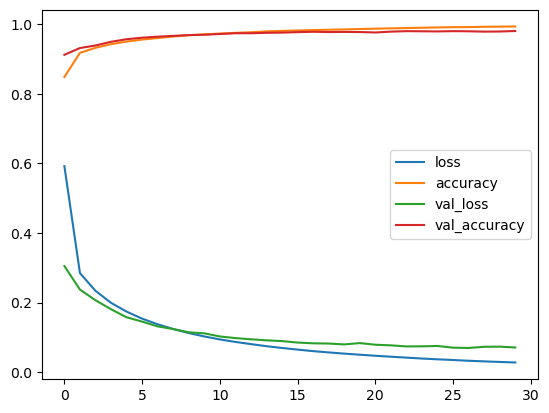

In [25]:
pd.DataFrame(history.history).plot()

### <font color = '#AA00FF'> Observation :
* As we can see that train and validation accuracy curve are close to each other which denotes that there is no overfitting in the model.

---

### <font color = 'blue'> Evaluation -  to get the loos and accuracy

In [26]:
model_clf.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0702 - accuracy: 0.9791


[0.07015524804592133, 0.9790999889373779]

---

### <font color = 'blue'> Sample check test data

In [27]:
x_new = x_test[:3]

In [28]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<AxesSubplot:>

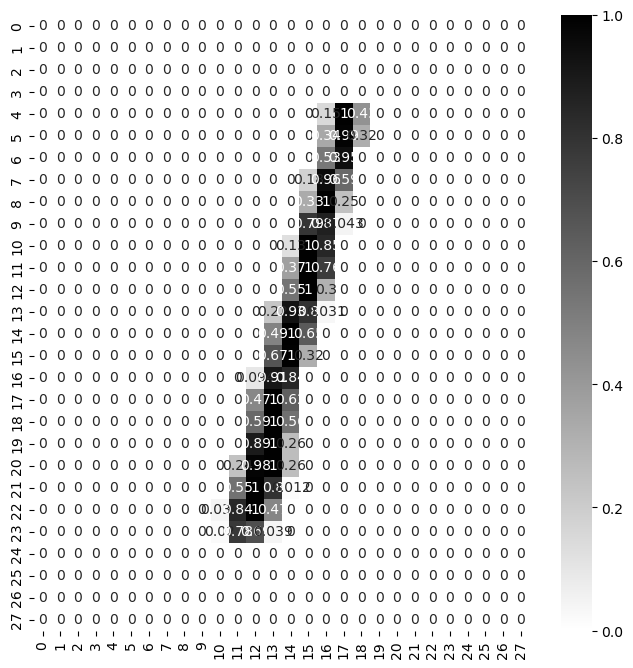

In [29]:
plt.figure(figsize = (8, 8))
sns.heatmap(x_test[2], annot = True, cmap = 'binary')

---

In [30]:
y_prob = model_clf.predict(x_new)
y_prob.round(2)

1/1 [==============================] - 0s 96ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### <font color = '#AA00FF'> Observation :
* Array tell to which class our images belongs too.

In [31]:
y_prob

array([[1.65690176e-06, 1.22662541e-07, 3.43500251e-05, 6.02534681e-04,
        1.12353726e-09, 3.94219512e-07, 2.73583158e-13, 9.99346912e-01,
        2.18244918e-06, 1.18628695e-05],
       [5.77331569e-08, 5.57213355e-07, 9.99996662e-01, 9.98733753e-07,
        1.17000409e-12, 6.43821636e-08, 4.96554975e-08, 2.76720297e-13,
        1.62462266e-06, 4.61488486e-13],
       [9.43710984e-06, 9.96222138e-01, 3.40908126e-04, 1.83159100e-05,
        3.18044011e-04, 8.21306894e-05, 1.21753801e-04, 2.08042469e-03,
        7.99009518e-04, 7.84260646e-06]], dtype=float32)

---

In [32]:
y_pred = np.argmax(y_prob, axis = -1)
y_pred

array([7, 2, 1], dtype=int64)

---

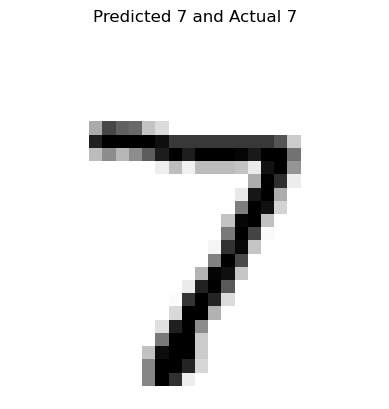

------------------------------------------------------------


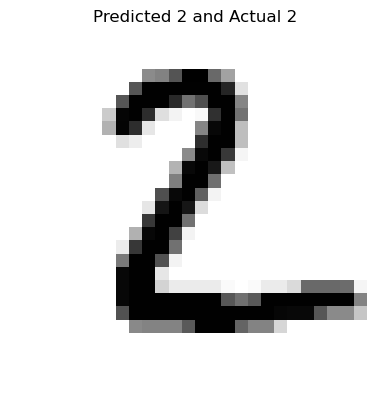

------------------------------------------------------------


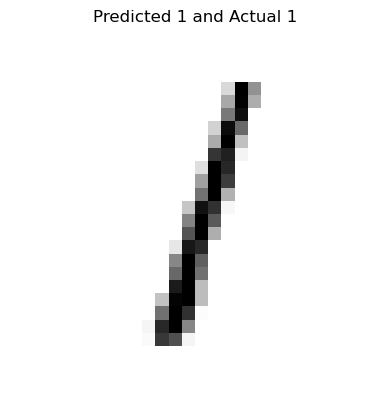

------------------------------------------------------------


In [33]:
for data, pred, actual_data in zip(x_new, y_pred, actual):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted {pred} and Actual {actual_data}")
    plt.axis("off")
    plt.show() 
    print('-'.center(60,'-'))

---